* https://drive.google.com/file/d/1todwi6NRInDwkFY24sSneP0c7RGTNTms/view?usp=sharing

#### konlpy 정상동작 확인

In [1]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs("KoNLPy가 정상 설치되었는지 확인 중입니다."))


['KoNLPy', '가', '정상', '설치', '되었는지', '확인', '중', '입니다', '.']


In [2]:
import jpype
if not jpype.isJVMStarted():
    jpype.startJVM()
print("JPype와 JVM이 정상 작동 중입니다.")


JPype와 JVM이 정상 작동 중입니다.


In [3]:
import pandas as pd

#### 데이터 준비

In [4]:
# ------------------------------
#   파일 경로
# ------------------------------
data_file = 'data\\네이버증권뉴스\\주요뉴스_2025-04-23_1745389232.csv'

# ------------------------------
#   불러올 컬럼명
# ------------------------------
col_name = 'title'

# ------------------------------
#   데이터 불러오기
# ------------------------------
data = pd.read_csv(data_file).loc[:,col_name].dropna()

# ------------------------------
#   내용 컬럼을 하나의 문장으로 합치기
# ------------------------------
text = ' '.join(data)
text

'PBR 0.1 기업 정리한다는데…청산 가치보다 낮은 기업 어디? 달러 가치 회복 나선 미국…지속되는 환율 ‘레인지 장’ ‘머스크 복귀 예고’에 테슬라 이어 韓 2차전지주도 강세 금감원 제동에도 유증 재도전 나선 스맥, 다윗의 골리앗 인수 가능할까 5년만에 역성장...편의점, 해외 노린다 [마켓딥다이브] 트럼프 관세전쟁에 \'셀 아메리카\'…유럽펀드로 갈아타는 투자자들 증여 소식에 한미반도체 13% 상승 \'훨훨\' [줍줍리포트]  "풍산, 나홀로 저평가…인적분할 시 기업가치 두 배 뛴다"[마켓칼럼] "주가 변동률 120%"…정치인 테마주 과열에 \'강력 경고\' BYD에 밀린 테슬라…머스크 컴백에도 불안 [테크톡톡] "점심시간 1시간 엄수" 공지에…여의도 증권맨들 \'초긴장\' [돈앤톡] 테슬라 시간외 급등에…국내 이차전지株 \'들썩\' 투자경고 이상 종목 중 절반이 \'정치테마주\'…121% 변동에 \'투자주의보\' 과열된 정치 테마주 폭등락… 거래소 “불공정거래, 강력 대처” 최상목 매수 논란 미국 채권…일본은 팔고 한국은 사고 \'나홀로 돈 벌었다\'…중국 탈출 러시에 \'대피처\'로 뜬 나라 "저가매수 신중해라"…과도한 낙관은 \'금물\' "진정한 바닥 오지 않았다"…추가 하락 \'경고등\' 땡큐 트럼프! 中 협상 가능성에 가상자산 환호…비트코인 9만3000달러 돌파 9.3만弗 회복한 비트코인...금 따라갈까 [매일코인]'

#### 문자열 정제
* 한글만 남기기

In [5]:
import re
clean_text = re.sub(r'[^가-힇\s]', ' ', text)
clean_text

'        기업 정리한다는데 청산 가치보다 낮은 기업 어디  달러 가치 회복 나선 미국 지속되는 환율  레인지 장   머스크 복귀 예고 에 테슬라 이어    차전지주도 강세 금감원 제동에도 유증 재도전 나선 스맥  다윗의 골리앗 인수 가능할까  년만에 역성장   편의점  해외 노린다  마켓딥다이브  트럼프 관세전쟁에  셀 아메리카  유럽펀드로 갈아타는 투자자들 증여 소식에 한미반도체     상승  훨훨   줍줍리포트    풍산  나홀로 저평가 인적분할 시 기업가치 두 배 뛴다  마켓칼럼   주가 변동률       정치인 테마주 과열에  강력 경고     에 밀린 테슬라 머스크 컴백에도 불안  테크톡톡   점심시간  시간 엄수  공지에 여의도 증권맨들  초긴장   돈앤톡  테슬라 시간외 급등에 국내 이차전지   들썩  투자경고 이상 종목 중 절반이  정치테마주       변동에  투자주의보  과열된 정치 테마주 폭등락  거래소  불공정거래  강력 대처  최상목 매수 논란 미국 채권 일본은 팔고 한국은 사고  나홀로 돈 벌었다  중국 탈출 러시에  대피처 로 뜬 나라  저가매수 신중해라  과도한 낙관은  금물   진정한 바닥 오지 않았다  추가 하락  경고등  땡큐 트럼프    협상 가능성에 가상자산 환호 비트코인  만    달러 돌파    만  회복한 비트코인   금 따라갈까  매일코인 '

* 블용어 사전

In [6]:
# -----------------------
# 외부 불용어 사전
# -----------------------

import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/refs/heads/master/stopwords-ko.txt"
response = requests.get(url)

# 줄 단위로 나누고, 공백 제거 후 리스트 생성
external_stopwords = [line.strip() for line in response.text.splitlines() if line.strip()]

# -----------------------
# 커스터마이즈 불용어 사전
# -----------------------
custom_stopwords = []


# -----------------------
# 최종 불용어 사전
#   외부 불용어 사전, 커스터마이즈 불용어사전 합치고 중복 제거
# -----------------------
stopwords = set(external_stopwords + custom_stopwords)

#### 명사 추출 및 불용어 제거
* KoNLPy라이브러리의 형태소분석기 사용
* KoNLPy 사용 시 자바(JDK)가 필요할 수 있으니, 환경에 따라 JDK 설치 및 JAVA_HOME 환경변수 설정이 필요할 수도 있습니다​

In [7]:
# ----------------------------
# 형태소 분석기로 명사만 추출
# ----------------------------

from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(clean_text)

# ----------------------------
# 한글자인 명사와 불용어 제거
# ----------------------------

filtered_nouns = [
    n for n in nouns
    if len(n) > 1 and n not in stopwords
]

#### 단어 빈도 계산
* 리스트에서 각 항목이 몇 번 나오는지 카운트

In [8]:
from collections import Counter

counter = Counter(filtered_nouns)  # 명사 리스트를 Counter 객체로 변환
print(counter.most_common(10))

[('기업', 3), ('가치', 3), ('테슬라', 3), ('테마주', 3), ('달러', 2), ('나선', 2), ('미국', 2), ('머스크', 2), ('마켓', 2), ('트럼프', 2)]


#### 상위명사 추출

In [9]:
top50 = dict(counter.most_common(50))  # 가장 많이 등장한 50개 단어만 추출하여 딕셔너리 생성

#### 한글 폰트 설정 및 워드클라우드 시각화

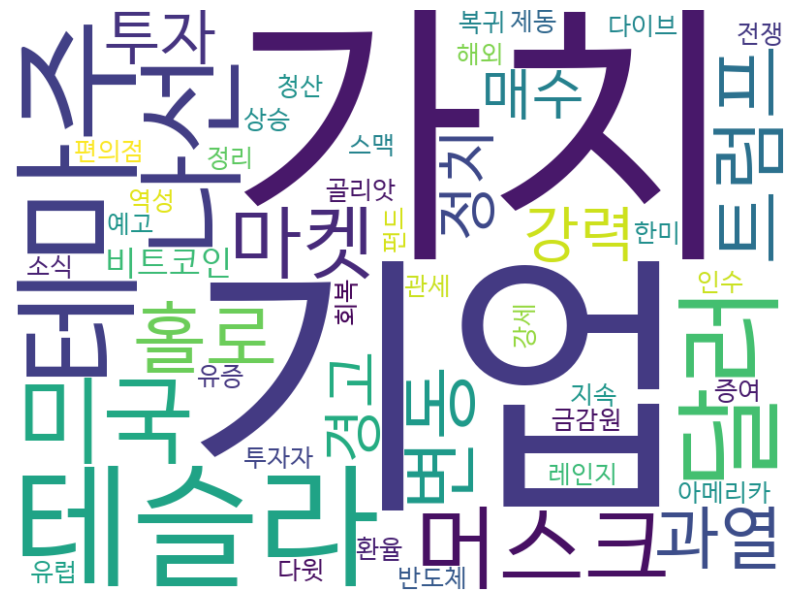

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'  # 한글 폰트 경로 (환경에 맞게 변경)
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)

# 앞서 계산한 단어 빈도 사용하여 워드클라우드 생성
cloud = wc.generate_from_frequencies(top50)  # 또는 wc.generate_from_frequencies(counter) 전체 단어 사용

# 워드클라우드 이미지 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()


In [11]:
from matplotlib import font_manager

# 시스템에 설치된 모든 폰트 리스트 가져오기
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 한글 폰트만 필터링 (이름에 'Malgun', 'Gothic', 'Nanum', 'Apple' 등 포함)
korean_fonts = [f for f in font_list if 'malgun' in f.lower() or
                                         'gothic' in f.lower() or
                                         'nanum' in f.lower() or
                                         'apple' in f.lower()]

# 결과 확인
for font in korean_fonts:
    print(font)


C:\Windows\Fonts\Hancom Gothic Bold.ttf
C:\Windows\Fonts\NanumMyeongjo.ttf
C:\Windows\Fonts\Hancom Gothic Regular.ttf
C:\Windows\Fonts\malgunbd.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumPen.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundEB.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunpenR.ttf
C:\Windows\Fonts\NanumGothicExtraBold.ttf
C:\Windows\Fonts\malgunsl.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunpenB.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Windows\Fonts\NanumGothicBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothicLight.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothic.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumGothicLight.ttf
C:\Windows\Fonts\NanumMyeo